In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("Alatau district.csv")
df

,Year,Population,District Population,Migration,Birth,Death
0,2000,1 130 439,NaN,NaN,NaN,NaN
1,2001,1 128 759,NaN,NaN,NaN,NaN
2,2002,1 132 424,NaN,NaN,NaN,NaN
3,2003,1 149 641,NaN,NaN,NaN,NaN
4,2004,1 175 208,NaN,NaN,NaN,NaN
5,2005,1 209 485,NaN,NaN,NaN,NaN
6,2006,1 247 896,NaN,NaN,NaN,NaN
7,2007,1 287 246,NaN,NaN,NaN,NaN
8,2008,1 324 739,NaN,NaN,NaN,NaN
9,2009,1 361 877,150 819,104.0,"2,725","1,646"


In [10]:
df = df.dropna()
df['Population'] = df['Population'].astype(str).str.replace(' ', '').astype(int)
df['District Population'] = df['District Population'].astype(str).str.replace(' ', '').astype(int)
df['Birth'] = df['Birth'].astype(str).str.replace(',', '.').astype(float)
df['Death'] = df['Death'].astype(str).str.replace(',', '.').astype(float)


df

/tmp/ipykernel_3702/3957259955.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Population'] = df['Population'].astype(str).str.replace(' ', '').astype(int)
/tmp/ipykernel_3702/3957259955.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['District Population'] = df['District Population'].astype(str).str.replace(' ', '').astype(int)
/tmp/ipykernel_3702/3957259955.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

,Year,Population,District Population,Migration,Birth,Death
9,2009,1361877,150819,104.0,2.725,1.646
10,2010,1390610,157104,214.0,4.215,1.233
11,2011,1413152,162397,185.0,3.748,1.839
12,2012,1449366,168335,246.0,3.672,1.827
13,2013,1474849,175378,121.0,3.448,1.751
14,2014,1506899,177902,11.0,3.745,1.765
15,2015,1641444,195348,-39.0,3.776,1.521
16,2016,1702766,208082,8.0,3.644,1.581
17,2017,1751308,215387,13.0,3.402,887.000
18,2018,1801993,244319,5.0,3.458,1.075


/tmp/ipykernel_3702/2330635385.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = pd.to_datetime(df['Year'], format='%Y')
/home/agytai/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


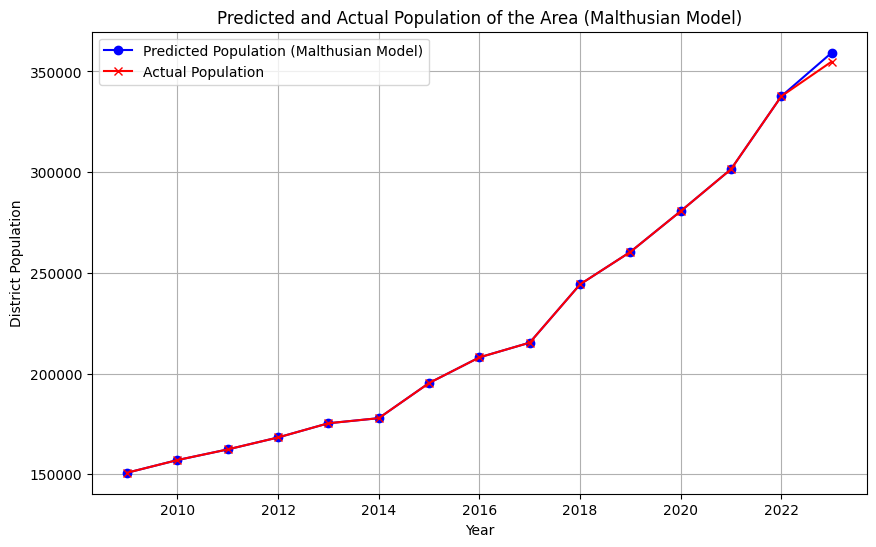

MSE: 19328261.71355312
R2: nan


In [11]:
from sklearn.metrics import mean_squared_error, r2_score
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.set_index('Year', inplace=True)
y_train = df[df.index.year <= 2022]['District Population']
y_test = df[df.index.year > 2022]['District Population']


def malthusian_model(P0, r, t):
    return P0 * np.exp(r * t)


P0 = y_train.iloc[0]
r_values = []

for i in range(1, len(y_train)):
    r = np.log(y_train.iloc[i] / y_train.iloc[i-1])
    r_values.append(r)

r_mean = np.mean(r_values)


years_test = np.arange(2023, 2024) - 2022
predicted_population_malthus = malthusian_model(y_train.iloc[-1], r_mean, years_test)


if len(y_test) == len(predicted_population_malthus):
    
    mse_malthus = mean_squared_error(y_test, predicted_population_malthus)
    r2_malthus = r2_score(y_test, predicted_population_malthus)

    
    years_full = np.arange(2009, 2024)
    population_full_malthus = np.concatenate((y_train.values, predicted_population_malthus))

    plt.figure(figsize=(10, 6))
    plt.plot(years_full, population_full_malthus, marker='o', linestyle='-', color='b', label='Predicted Population (Malthusian Model)')
    plt.plot(df.index.year, df['District Population'], marker='x', linestyle='-', color='r', label='Actual Population')
    plt.xlabel('Year')
    plt.ylabel('District Population')
    plt.title('Predicted and Actual Population of the District (Malthusian Model)')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f'MSE: {mse_malthus}')
    print(f'R2: {r2_malthus}')
else:
    print("Error: The sizes of the predicted and test datasets do not match.")


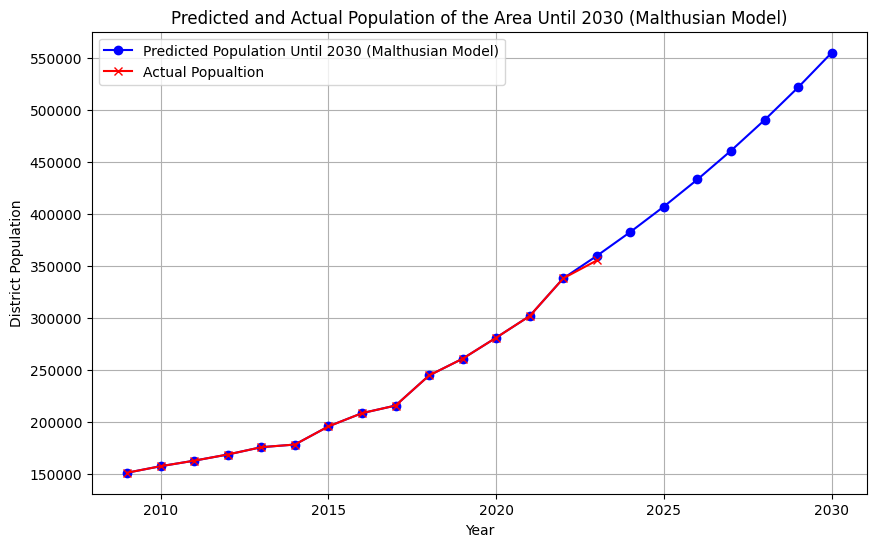

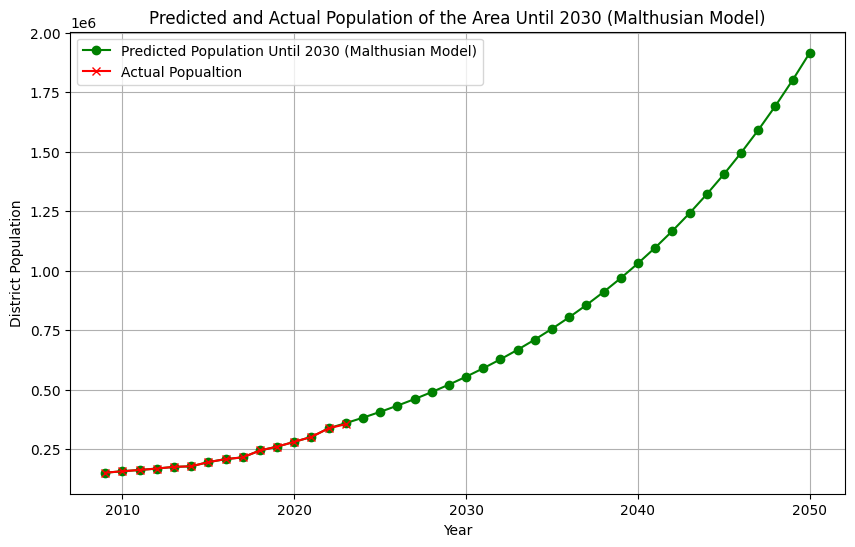

In [12]:
y_train_2030 = df[df.index.year <= 2022]['District Population']
y_test_2030 = df[df.index.year > 2022]['District Population']

years_2030 = np.arange(2023, 2031) - 2022
years_2050 = np.arange(2023, 2051) - 2022

predicted_population_malthus_2030 = malthusian_model(y_train_2030.iloc[-1], r_mean, years_2030)
predicted_population_malthus_2050 = malthusian_model(y_train_2030.iloc[-1], r_mean, years_2050)


years_full_2030 = np.arange(2009, 2031)
years_full_2050 = np.arange(2009, 2051)

population_full_malthus_2030 = np.concatenate((y_train_2030.values, predicted_population_malthus_2030))
population_full_malthus_2050 = np.concatenate((y_train_2030.values, predicted_population_malthus_2050))

# Chart Until 2030
plt.figure(figsize=(10, 6))
plt.plot(years_full_2030, population_full_malthus_2030, marker='o', linestyle='-', color='b', label='Predicted Population Until 2030 (Malthusian Model)')
plt.plot(df.index.year, df['District Population'], marker='x', linestyle='-', color='r', label='Actual Popualtion')
plt.xlabel('Year')
plt.ylabel('District Population')
plt.title('Predicted and Actual Population of the Area Until 2030 (Malthusian Model)')
plt.legend()
plt.grid(True)
plt.show()

# Chart Until 2050
plt.figure(figsize=(10, 6))
plt.plot(years_full_2050, population_full_malthus_2050, marker='o', linestyle='-', color='g', label='Predicted Population Until 2030 (Malthusian Model)')
plt.plot(df.index.year, df['District Population'], marker='x', linestyle='-', color='r', label='Actual Popualtion')
plt.xlabel('Year')
plt.ylabel('District Population')
plt.title('Predicted and Actual Population of the Distrcit Until 2030 (Malthusian Model)')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
forecast_years_2050 = np.arange(2023, 2051)
forecast_df_2050 = pd.DataFrame({
    'Year': forecast_years_2050,
    'Predicted District Population': predicted_population_malthus_2050
})

print("\nPredicted Population Until 2050 Using the Malthusian Model")
print(forecast_df_2050)


Predicted Population Until 2050 Using the Malthusian Model
    Year  Predicted District Population
0   2023                   3.593114e+05
1   2024                   3.822968e+05
2   2025                   4.067525e+05
3   2026                   4.327727e+05
4   2027                   4.604575e+05
5   2028                   4.899132e+05
6   2029                   5.212533e+05
7   2030                   5.545982e+05
8   2031                   5.900762e+05
9   2032                   6.278237e+05
10  2033                   6.679860e+05
11  2034                   7.107175e+05
12  2035                   7.561825e+05
13  2036                   8.045560e+05
14  2037                   8.560240e+05
15  2038                   9.107843e+05
16  2039                   9.690478e+05
17  2040                   1.031038e+06
18  2041                   1.096995e+06
19  2042                   1.167170e+06
20  2043                   1.241835e+06
21  2044                   1.321275e+06
22  2045            

In [14]:
last_year = df.index.year[-1]
steps_2024 = 2024 - last_year
steps_2030 = 2030 - last_year
steps_2050 = 2050 - last_year

/home/agytai/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
15:25:28 - cmdstanpy - INFO - Chain [1] start processing
15:25:28 - cmdstanpy - INFO - Chain [1] done processing
/home/agytai/.local/lib/python3.10/site-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


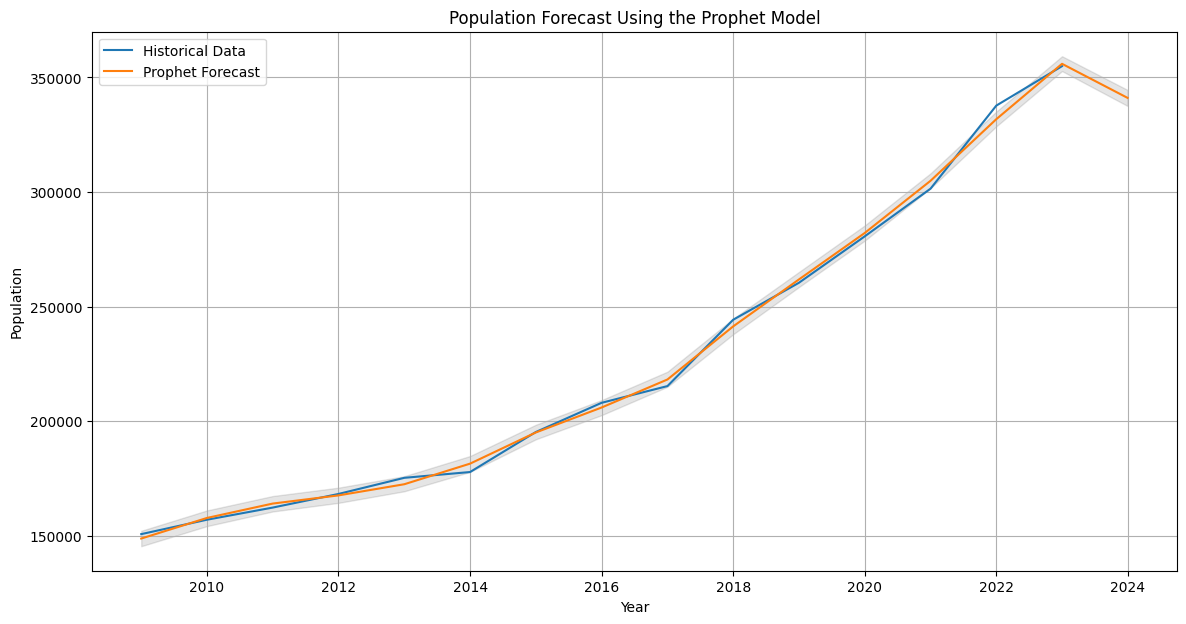

In [15]:
from prophet import Prophet
import matplotlib.pyplot as plt


df_prophet = df.reset_index()
df_prophet = df_prophet.rename(columns={'Year': 'ds', 'District Population': 'y'})


model_prophet = Prophet()
model_prophet.fit(df_prophet)


future = model_prophet.make_future_dataframe(periods=steps_2024, freq='Y')
forecast_prophet = model_prophet.predict(future)


plt.figure(figsize=(14, 7))
plt.plot(df['District Population'], label='Historical Data')
plt.plot(forecast_prophet['ds'], forecast_prophet['yhat'], label='Prophet Forecast')
plt.fill_between(forecast_prophet['ds'], forecast_prophet['yhat_lower'], forecast_prophet['yhat_upper'], color='k', alpha=0.1)
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Forecast Using the Prophet Model')
plt.legend()
plt.grid(True)
plt.show()


15:26:34 - cmdstanpy - INFO - Chain [1] start processing


15:26:34 - cmdstanpy - INFO - Chain [1] done processing
/home/agytai/.local/lib/python3.10/site-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


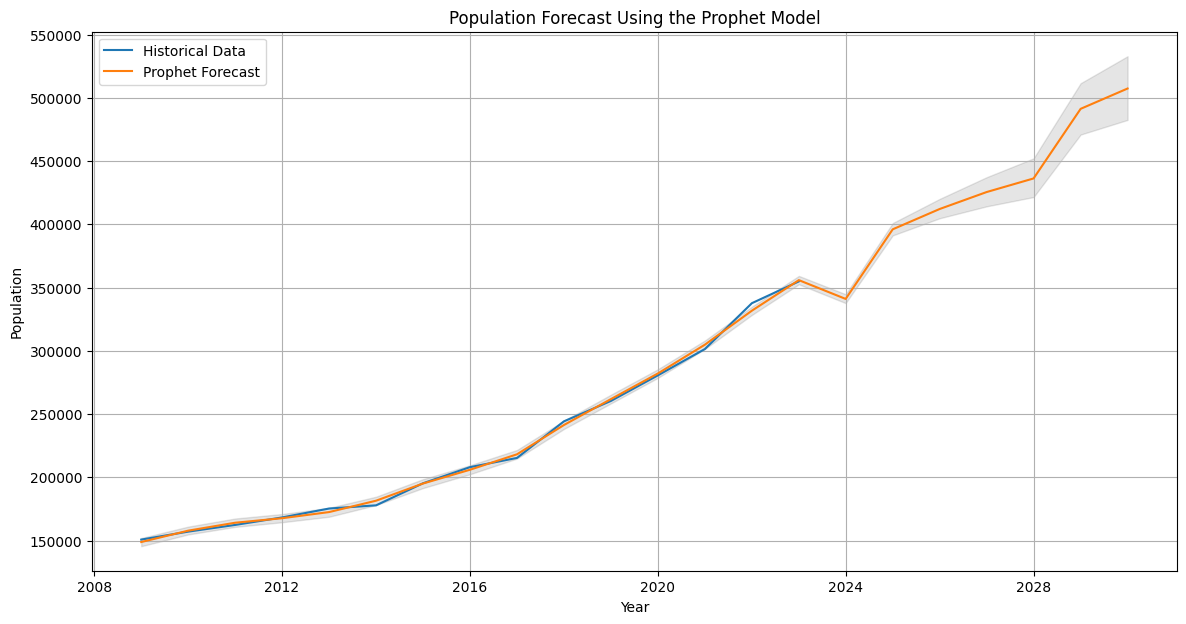

In [16]:
from prophet import Prophet
import matplotlib.pyplot as plt


df_prophet = df.reset_index()
df_prophet = df_prophet.rename(columns={'Year': 'ds', 'District Population': 'y'})


model_prophet = Prophet()
model_prophet.fit(df_prophet)


future = model_prophet.make_future_dataframe(periods=steps_2030, freq='Y')
forecast_prophet = model_prophet.predict(future)


plt.figure(figsize=(14, 7))
plt.plot(df['District Population'], label='Historical Data')
plt.plot(forecast_prophet['ds'], forecast_prophet['yhat'], label='Prophet Forecast')
plt.fill_between(forecast_prophet['ds'], forecast_prophet['yhat_lower'], forecast_prophet['yhat_upper'], color='k', alpha=0.1)
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Predicted and Actual Population of the District Until 2030 (Malthusian Model)')
plt.legend()
plt.grid(True)
plt.show()


15:27:37 - cmdstanpy - INFO - Chain [1] start processing


15:27:38 - cmdstanpy - INFO - Chain [1] done processing
/home/agytai/.local/lib/python3.10/site-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


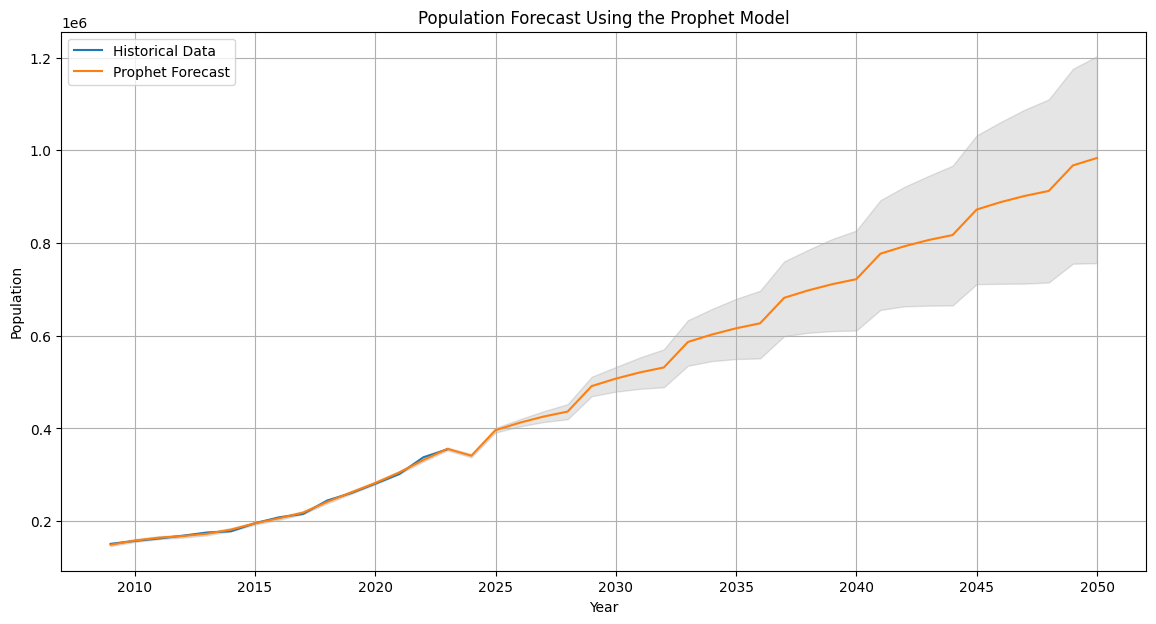

In [17]:
from prophet import Prophet
import matplotlib.pyplot as plt


df_prophet = df.reset_index()
df_prophet = df_prophet.rename(columns={'Year': 'ds', 'District Population': 'y'})


model_prophet = Prophet()
model_prophet.fit(df_prophet)


future = model_prophet.make_future_dataframe(periods=steps_2050, freq='Y')
forecast_prophet = model_prophet.predict(future)


plt.figure(figsize=(14, 7))
plt.plot(df['District Population'], label='Historical Data')
plt.plot(forecast_prophet['ds'], forecast_prophet['yhat'], label='Prophet Forecast')
plt.fill_between(forecast_prophet['ds'], forecast_prophet['yhat_lower'], forecast_prophet['yhat_upper'], color='k', alpha=0.1)
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Predicted and Actual Population of the District Until 2050 (Prophet Model)')
plt.legend()
plt.grid(True)
plt.show()


In [18]:

forecast_df_prophet = forecast_prophet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast_df_prophet = forecast_df_prophet.rename(columns={'ds': 'Year', 'yhat': 'Predicted Population', 'yhat_lower': 'Lower Bound', 'yhat_upper': 'Upper Bound'})


forecast_df_prophet = forecast_df_prophet[forecast_df_prophet['Year'].dt.year <= 2050]


forecast_df_prophet['Year'] = forecast_df_prophet['Year'].dt.year
forecast_df_prophet.set_index('Year', inplace=True)


print(forecast_df_prophet.head(30))  


      Predicted Population    Lower Bound    Upper Bound
Year                                                    
2009         148894.738805  145766.166219  152612.214612
2010         157875.337576  154676.766440  161312.299982
2011         164144.645061  160833.576612  167418.190357
2012         167707.337646  164162.995597  171020.438657
2013         172581.749989  169040.477877  175865.392199
2014         181562.348893  178129.638490  184881.899531
2015         195148.851518  192074.306883  198330.602153
2016         206033.271292  202575.147131  209446.935986
2017         218260.517723  214944.392645  221620.991128
2018         241422.412395  238043.805661  244560.774934
2019         261885.917033  258486.008100  265130.378966
2020         282130.664136  278762.169911  285202.428547
2021         304929.871410  301827.788021  308282.013698
2022         331786.290397  328340.089890  335093.015685
2023         355931.418082  352374.449152  358986.066728
2023         341075.096807  337

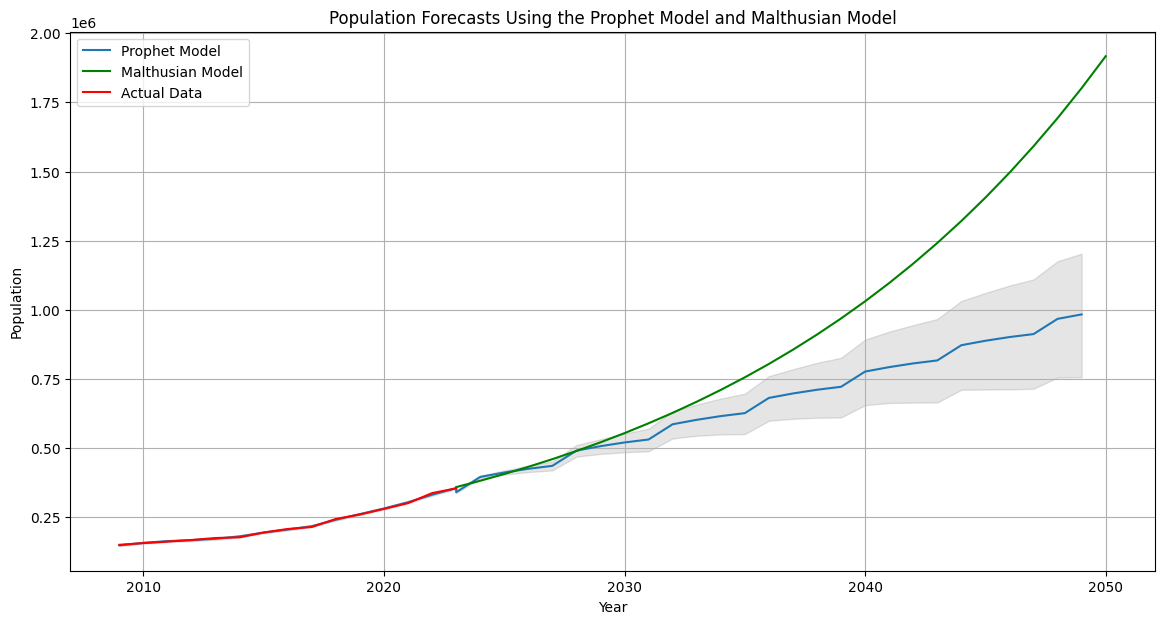

In [20]:
import matplotlib.pyplot as plt


plt.figure(figsize=(14, 7))
plt.plot(forecast_df_prophet.index, forecast_df_prophet['Predicted Population'], label='Prophet Model')
plt.fill_between(forecast_df_prophet.index, forecast_df_prophet['Lower Bound'], forecast_df_prophet['Upper Bound'], color='k', alpha=0.1)


plt.plot(forecast_df_2050['Year'], forecast_df_2050['Predicted District Population'], label='Malthusian Model', color='green')
plt.plot(df.index.year, df['District Population'], label='Actual Data', color='red')


plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Forecasts Using the Prophet Model and Malthusian Model')
plt.legend()
plt.grid(True)
plt.show()
